# Random Forest Regression

* Random Forest Regression algorithm is a strong algorithm when compared to other types of regression techniques.  
* A linear regression algorithm is denoted by a function, y = mx + c  
* A Random Forest Regression algorithm cannot be represented by those simple functions.  
* They produce better results when compared to other types of algorithms.  
* They are suitable for large datasets.  
* They work with missing data by creating estimates for them.  
* The major threat posed by Random Forest Regression is that they can't work beyond the normal range of data.  
* When we use Random Forest Regressor, the predicted values should never lie outside the range of training set values for the target variable.

### Advantages  

* When the data has non-linear trend, we can go for Random Forest Regression Algorithm.  
* When the extrapolation outside the training data is not so important, we can go for Random Forest Regression Algorithm.  

### Disadvantages  

* This algorithm cannot be used when the data is in a Time series form.  
* Every Time series problem require identification of a growing or decreasing trend that a Random Forest Regressor will not be able to formulate.

## Random Forest  

* A Random Forest Algorithm is nothing but a collection of decision trees.  
* Many trees are grouped together in a random way in order to create a Random Forest.  
* Every tree is constructed from a different samples of rows.  
* At each node, a different set of features is selected for splitting.  
* Each and every tree makes its own independent prediction.  
* All these Results are summarized in order to produce the final result.  
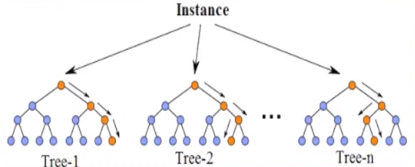  


* Averaging process makes the Random Forest Algorithm a better algorithm when compared to other types of algorithms.  
* Averaging process improves the accuracy and reduces overfitting.  
* It is an average of predictions produced by all the trees in the forest.  

### Drawback  
* If suppose, the values that are there in the training set lies within the range of 326 and 18823.  
* If any values lies outside this range, Random Forest algorithm cannot predict those values.  
* It cannot extrapolate (Extrapolation problem)  

## Extrapolation Problem  

* When we use Random Forest Regressor, the predicted values should never lie outside the range of training set values for the target variable.  
* The following is the graph of Random Forest Regressor:  
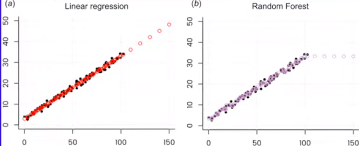  


* When Random Forest Regressor need to predict some values that is not previously seen, then it takes the average of all the previous seen values.  
* The average of a sample does not fall outside the highest and the lowest values in the sample.  
* This algorithm cannot find the hidden trends that would help the algorithm in extrapolating values that lie outside the training set.  
* When faced with such a situation, regressor assumes that the prediction will fall close to the maximum value in the training set.  

### Solutions:  

* There are few options to deal with extrapolation problem.  
* Instead of Random Forest Regression, we can use other regression models like SVM Regression, Linear Regression, etc.  
* Deep learning models can be built because thay are able to deal with the extrapolation problem.  
* The results of predictors can be combined using various stacking techniques.  
* A stacking regressor can be created using a Linear model and a Random Forest Regressor.  
* Based on the problem, some of the enhanced or modified versions of Random Forest Algorithm can be used.  
* One of the extensions of Random Forest Algorithm is the Regression Enhanced Random Forest Algorithm (RERFs).  
* There are two steps to the process:  
    - Run Lasso before Random Forest.  
    - Train a Random Forest on the residuals from Lasso.

# Agriculture Price Prediction System

### System Architecture  
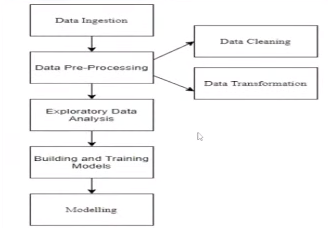

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Datasets/crop_price.csv')

In [3]:
df.shape

(7418, 10)

In [4]:
df.loc[1692]

timestamp           1523025126
state                   Kerala
district             Ernakulam
market          Thrippunithura
commodity        Cluster beans
variety          Cluster Beans
arrival_date        06/04/2018
min_price               3000.0
max_price               3800.0
modal_price             3400.0
Name: 1692, dtype: object

In [5]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [8]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

<AxesSubplot:>

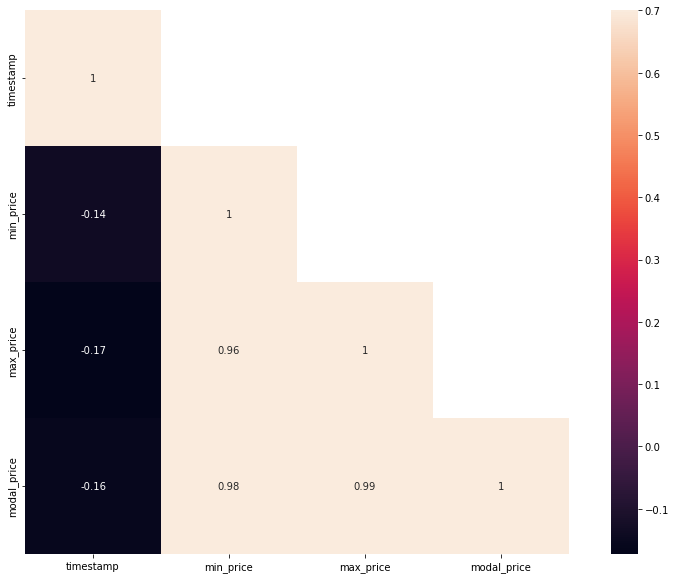

In [9]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(correlation_map, mask=obj, vmax=.7, square=True, annot=True)

In [14]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [15]:
df.state.nunique()

22

In [20]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [21]:
df.district.nunique()

348

In [22]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [27]:
def get_val(state, district, commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity)]
    fig, axes = plt.subplots(6, 1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp, y="min_price", x="market", orient="v", ax=axes[0])
    sns.pointplot(data=temp, y="min_price", x="market", orient="v", ax=axes[1])
    # sns.stripplot(data=temp, y="min_price", x="market", jitter=True, ax=axes[2])
    # sns.distplot(temp.modal_price, ax=axes[3])
    sns.barplot(data=temp, y="modal_price", x="market", orient="v", ax=axes[2])
    sns.pointplot(data=temp, y="modal_price", x="market", orient="v", ax=axes[3])
    sns.barplot(data=temp, y="max_price", x="market", orient="v", ax=axes[4])
    sns.pointplot(data=temp, y="max_price", x="market", orient="v", ax=axes[5])

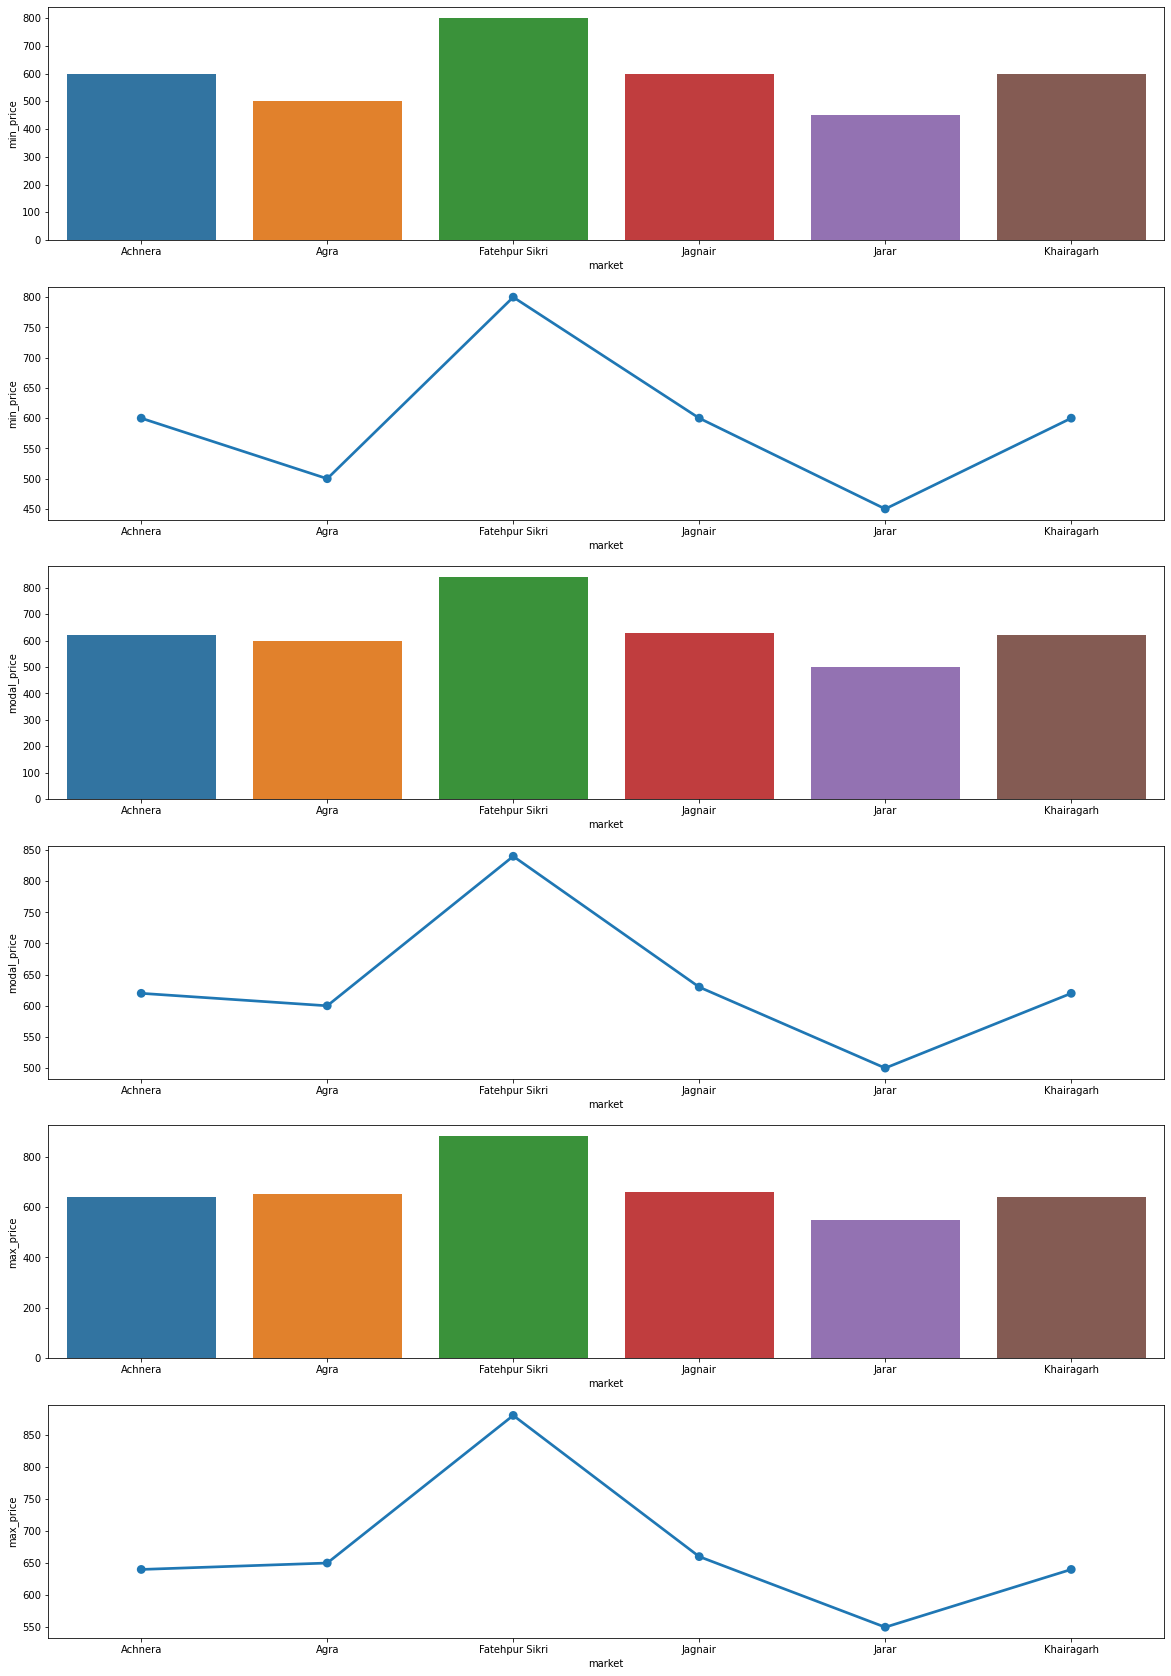

In [28]:
get_val("Uttar Pradesh", "Agra", "Brinjal")

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # used to convert text to numerical values
df['commodity'] = le.fit_transform(df['commodity'])
df['variety'] = le.fit_transform(df['variety'])

In [30]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,21,52,06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,50,86,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,93,312,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,102,207,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,125,221,06/04/2018,3550.0,3650.0,3600.0


In [31]:
X = df.iloc[:, [4, 5, 7, 8]]
y = df['modal_price']

In [32]:
X.loc[1692]

commodity      41.0
variety        78.0
min_price    3000.0
max_price    3800.0
Name: 1692, dtype: float64

In [33]:
y.loc[1692]

3400.0

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
X_test.loc[1692]

commodity      41.0
variety        78.0
min_price    3000.0
max_price    3800.0
Name: 1692, dtype: float64

In [36]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.metrics import r2_score
y_pred = alg.predict(X_test)
accuracy_1 = r2_score(y_pred, y_test)
print("Accuracy 1:", accuracy_1)
y_pred

Accuracy 1: 0.992368576835764


array([3489.39790971, 6716.12259556, 2191.43022183, ..., 2193.03639206,
       3598.82193142, 4266.78503184])

In [39]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
print("RMSE:", rmse)

RMSE: 334.53448911167055


In [40]:
X.shape

(7418, 4)

In [46]:
from sklearn.model_selection import cross_val_score
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring="neg_mean_squared_error")

In [47]:
for i in range(0, 5):
    scores[i] = sqrt(-1 * scores[i])

In [49]:
print(scores)

print("\n\nr2_score is:", r2_score(y_pred, y_test))
avg_rmse_phos = scores.mean()
print("\n\nAvg RMSE is:", scores.mean())

[349.14610144 505.23651023 268.67731891 368.61847971 146.38580753]


r2_score is: 0.992368576835764


Avg RMSE is: 327.61284356314155


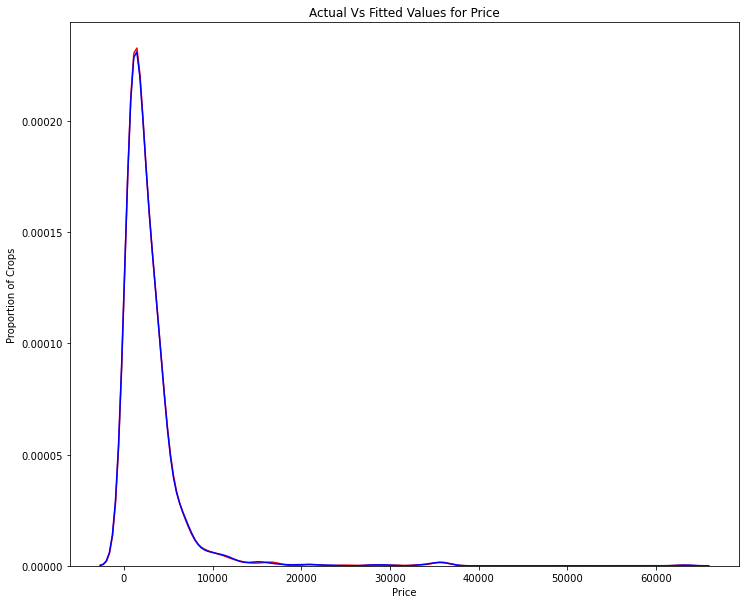

In [50]:
width = 12
height = 10
plt.figure(figsize = (width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual Vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Crops')

plt.show()
plt.close()

## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [52]:
rfr.fit(X_train, y_train) # Training the model
y_predict = rfr.predict(X_test)
accuracy_2 = rfr.score(X_test, y_test)
accuracy_2

0.9919107300158878

In [55]:
y_predict

array([3472.90333333, 6763.66      , 2195.        , ..., 2202.65      ,
       3519.33333333, 4309.5       ])

In [56]:
print("r2_score:", r2_score(y_predict, y_test))

r2_score: 0.9917509665886336
